In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Load the data
df = pd.read_csv("dataset_1.csv")
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1


In [19]:
df.info()  #checking if there is any inconsistency in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id           150 non-null int64
Feature_1    150 non-null float64
Feature_2    150 non-null float64
Feature_3    150 non-null float64
Feature_4    150 non-null float64
target       150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1


In [21]:
df.shape #For checking the shape of the data

(150, 6)

In [22]:
Counter(df.target) #To count the number of target

Counter({'Class_1': 50, 'Class_2': 50, 'Class_3': 50})

In [23]:
df.isnull().sum().to_frame() # To check for the null values in the data

,0
Id,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
target,0


In [28]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'target'], dtype='object')

In [29]:
print(df['target'].unique())

['Class_1' 'Class_2' 'Class_3']


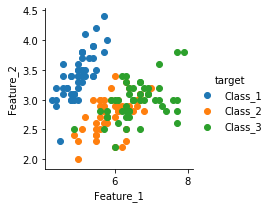

In [33]:
sns.FacetGrid(df,hue="target",size=3).map(plt.scatter,"Feature_1","Feature_2").add_legend();
plt.show()

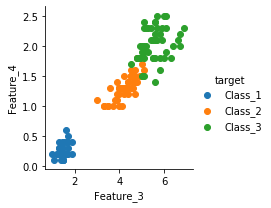

In [34]:
sns.FacetGrid(df,hue="target",size=3).map(plt.scatter,"Feature_3","Feature_4").add_legend();
plt.show()

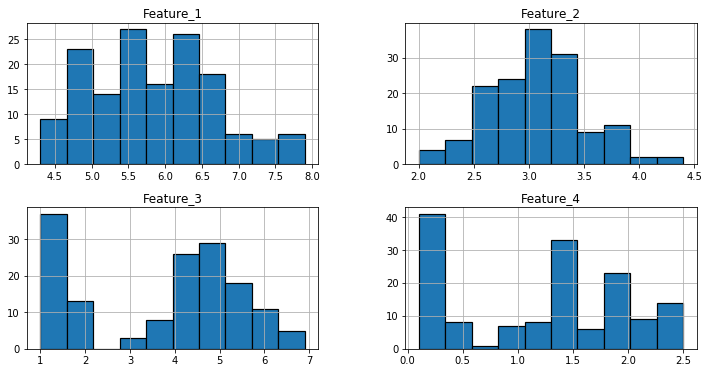

In [35]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

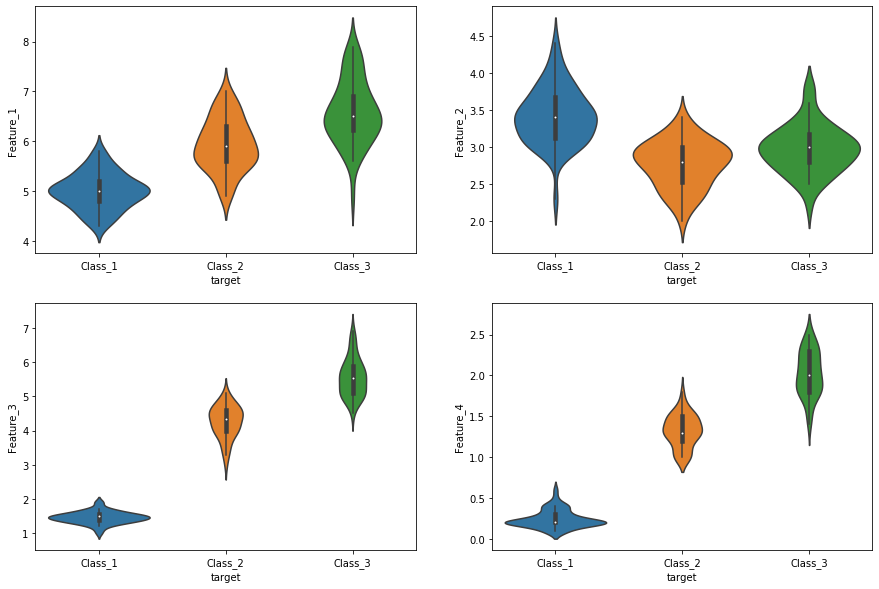

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='Feature_1',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='Feature_2',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='Feature_3',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='Feature_4',data=df)

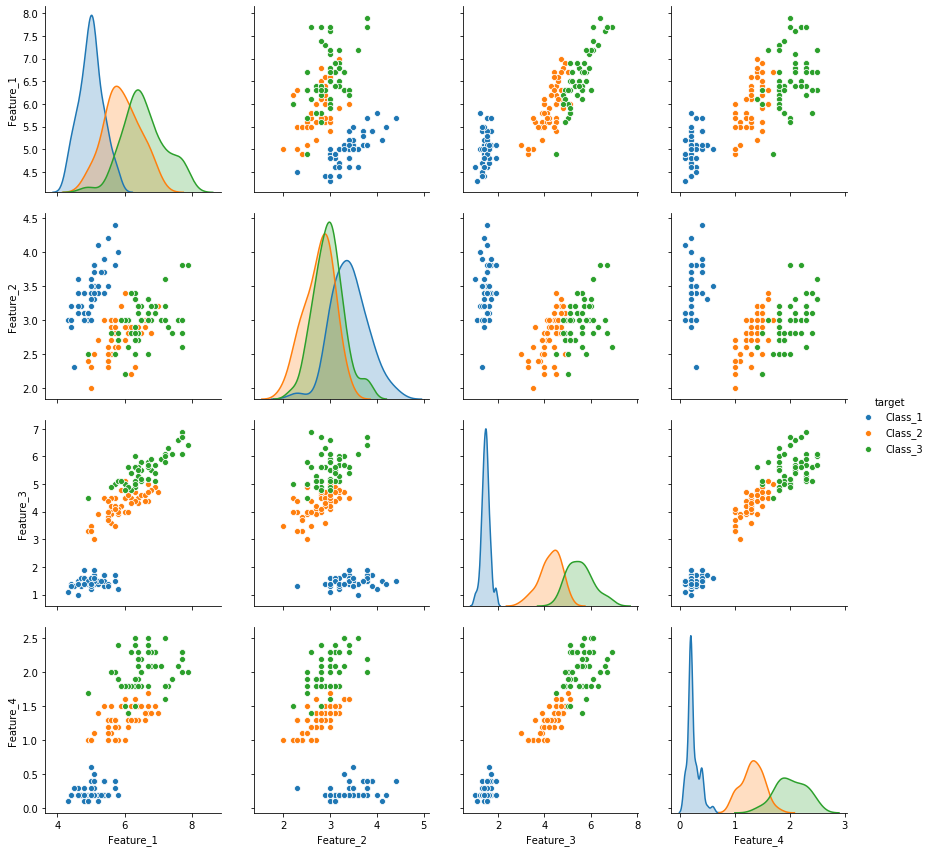

In [37]:
sns.pairplot(df,hue="target",size=3)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["target"] = labelencoder.fit_transform(df["target"])
df

,Feature_1,Feature_2,Feature_3,Feature_4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
#Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Feature_1,Feature_2,Feature_3,Feature_4,target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

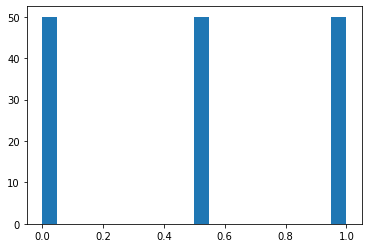

In [46]:
plt.hist(df_minmax['target'],bins=20)

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10., 12.,  4., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

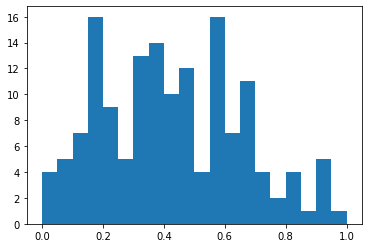

In [43]:
plt.hist(df_minmax['Feature_1'],bins=20)

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 12., 19., 12.,  6.,
         3.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

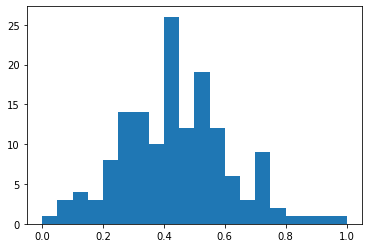

In [44]:
plt.hist(df_minmax['Feature_2'],bins=20)

(array([ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
        17.,  6., 12.,  7.,  4.,  2.,  3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

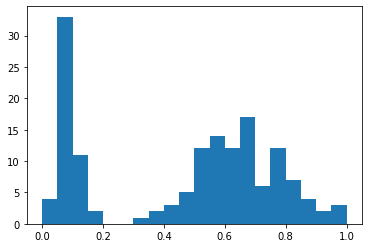

In [47]:
plt.hist(df_minmax['Feature_3'],bins=20)

(array([34.,  7.,  7.,  1.,  1.,  0.,  0.,  7.,  3.,  5., 21., 12.,  4.,
         2., 12., 11.,  6.,  3.,  8.,  6.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

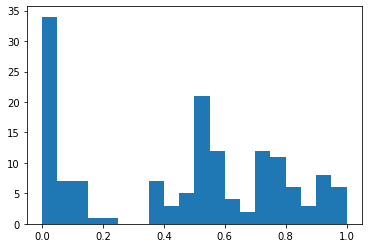

In [48]:
plt.hist(df_minmax['Feature_4'],bins=20)

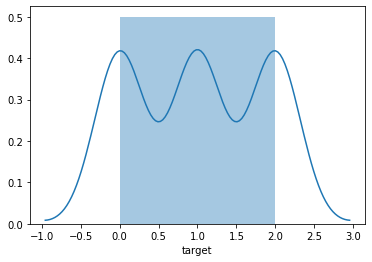

In [52]:
sns.distplot(df['target'].dropna())

In [53]:
corr_matrix = df.corr()

In [54]:
corr_matrix["target"].sort_values(ascending=False)

target       1.000000
Feature_4    0.956464
Feature_3    0.949043
Feature_1    0.782561
Feature_2   -0.419446
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001867642B088>,
      dtype=object)

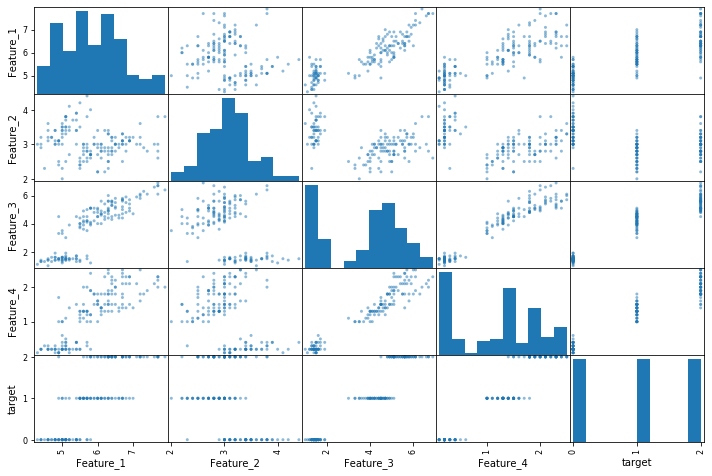

In [55]:
from pandas.plotting import scatter_matrix
attributes = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'target']
scatter_matrix(df[attributes], figsize=(12, 8))

In [59]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [60]:
df.shape #get the shape of the dataset

(150, 5)

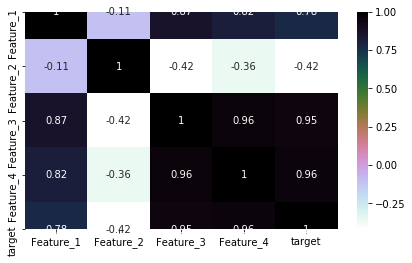

In [61]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)# in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [72]:
train_X = train[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']]# taking the training data features
train_y=train.target # output of our training data
test_X= test[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']] # taking test data features
test_y =test.target   #output value of test data

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [84]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
conf_matrix = confusion_matrix(y_true=test_y, y_pred=prediction)

The accuracy of the SVM is: 1.0


In [86]:
confusion_matrix(test_y, prediction)

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 10]], dtype=int64)

In [92]:
from sklearn.metrics import f1_score
f1_score(test_y, prediction, average='weighted')

1.0

In [93]:
from sklearn.metrics import precision_score, recall_score
precision_score(test_y, prediction, average='weighted')

1.0

In [94]:
recall_score(test_y, prediction, average='weighted')

1.0

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9666666666666667


In [100]:
confusion_matrix(test_y, prediction)

array([[ 7,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 10]], dtype=int64)

In [101]:
precision_score(test_y, prediction, average='weighted')

0.9696969696969696

In [102]:
recall_score(test_y, prediction, average='weighted')

0.9666666666666667

In [103]:
f1_score(test_y, prediction, average='weighted')

0.9667936507936508

In [75]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8666666666666667


In [76]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9666666666666667


([<matplotlib.axis.XTick at 0x18678809c08>,
 <a list of 10 Text xticklabel objects>)

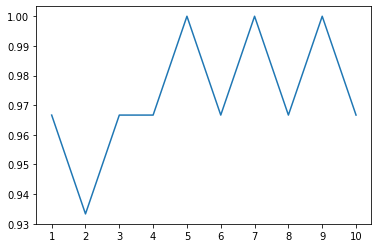

In [77]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)